In [2]:
#Dependencies

import requests
import json
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# The path to our CSV file
#(name the file we are going to read as "file_gdp")
file_gdp = "suicides_vs_gdp_o.csv"

# Read Suicide Data our Kickstarter data into pandas 
#rename it as a dataframe(df) for ease of readibiity
su_vs_gdp_o_df = pd.read_csv(file_gdp)

# Display all columns 
su_vs_gdp_o_df.columns

# Display information of the df
su_vs_gdp_o_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
index                27820 non-null int64
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
country-year         27820 non-null object
year_gdp             27820 non-null float64
gdp_per_capita       27820 non-null object
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
# Group using 'country-year' column and using the aggregate command to define/combine data to respective column.
# for ease of readibility(also we are ommitting columns we do not need)
su_vs_gdp_df = su_vs_gdp_o_df.groupby('country-year').agg({'country':'first', 'year':'first', 
                                                           'suicides_no':'sum','population':'sum', 
                                                           'suicides/100k pop':'sum',
                                                           'year_gdp':'first',
                                                           'gdp_per_capita':'first'}).reset_index()
# Save/Create CSV file
su_vs_gdp_df.to_csv('cleaned_su_vs_gdp.csv')

In [5]:
# Read/Create new df(all years, all suicide rates)
clean = "cleaned_su_vs_gdp.csv"

su_vs_gdp_c_df = pd.read_csv(clean)
su_vs_gdp_c_df.head()

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
0,0,Albania1987,Albania,1987,73,2709600,31.85,2.160000e+09,$796.00
1,1,Albania1988,Albania,1988,63,2764300,32.46,2.130000e+09,$769.00
2,2,Albania1989,Albania,1989,68,2803100,33.40,2.340000e+09,$833.00
3,3,Albania1992,Albania,1992,47,2822500,18.00,7.090000e+08,$251.00
4,4,Albania1993,Albania,1993,73,2807300,32.56,1.230000e+09,$437.00


##  Info for countries with highest GDP for 2015"

In [6]:
# It is possible to sort based upon multiple columns
# here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2015_df = sort_gdp_df.query("year == '2015'")
gdp_2015_df.head(8)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2015_df_top_8 = gdp_2015_df.head(8)[['country', 'suicides/100k pop']]
gdp_2015_df_top_8


,country,suicides/100k pop
2270,United States,175.41
1145,Japan,206.04
835,Germany,150.34
2239,United Kingdom,86.74
1097,Italy,78.45
378,Brazil,77.45
1718,Republic of Korea,389.14
1773,Russian Federation,236.92


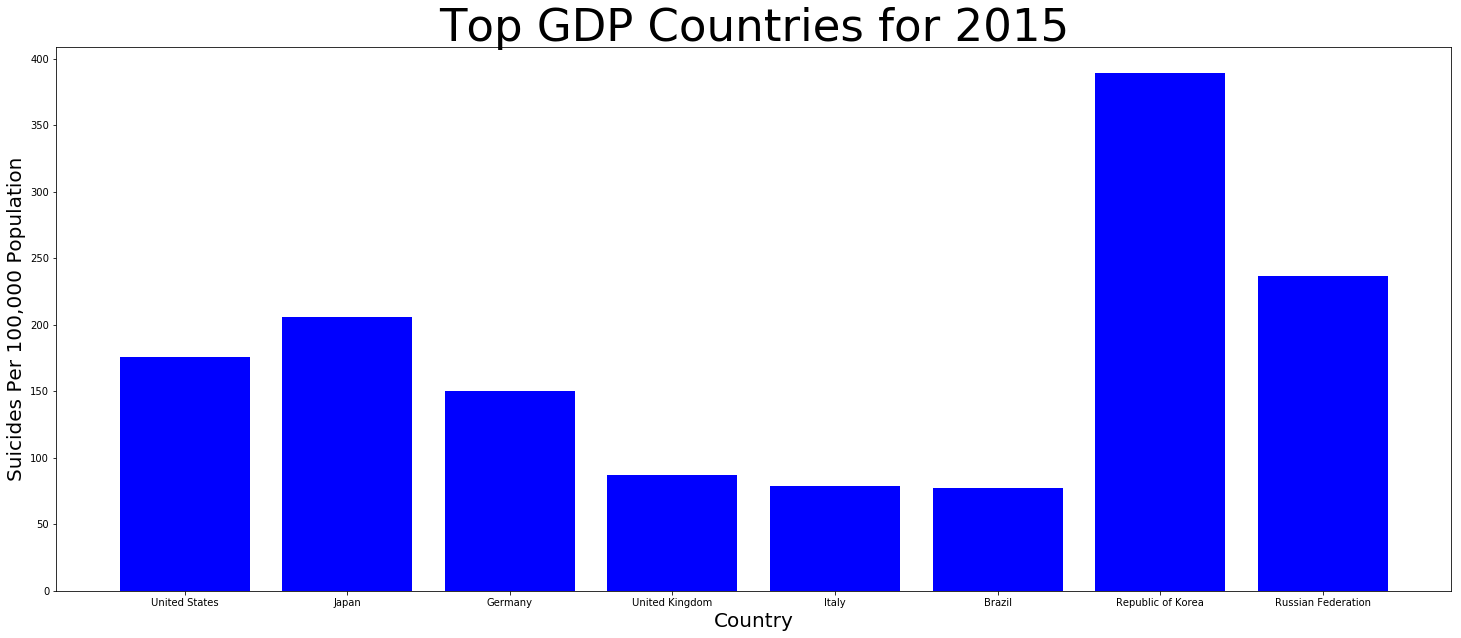

In [7]:
# Create an array that contains the number of users each language has
country1= gdp_2015_df_top_8['country']
suicides1=gdp_2015_df_top_8['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(25,10))
plt.bar(country1, suicides1, color="blue", align="center")


# # Give the chart a title, x label, and y label
plt.title("Top GDP Countries for 2015",fontsize=45)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Suicides Per 100,000 Population",fontsize=20)
plt.rcParams['font.size'] = 12.0

plt.savefig('top8_gdp_2015.png')

##  Info for countries with highest GDP for 2005"

In [8]:
# # It is possible to sort based upon multiple columns
# # here we are sorting by highest gdp
sort_gdp_df = su_vs_gdp_df.sort_values(["year_gdp"], ascending=False)

# Filter the data so that only those in 2015 are in a DataFrame and save as new dataframe(df)
gdp_2005_df = sort_gdp_df.query("year == '2005'")
gdp_2005_df.head(8)

#Create new dataframe(df) to hold top x countries with highest year_gdp
gdp_2005_df_top_8 = gdp_2005_df.head(8)[['country','suicides/100k pop']]
gdp_2005_df_top_8


,country,suicides/100k pop
2260,United States,146.68
1135,Japan,266.89
825,Germany,161.49
2229,United Kingdom,79.16
778,France,232.09
1087,Italy,82.59
430,Canada,133.84
1983,Spain,107.66


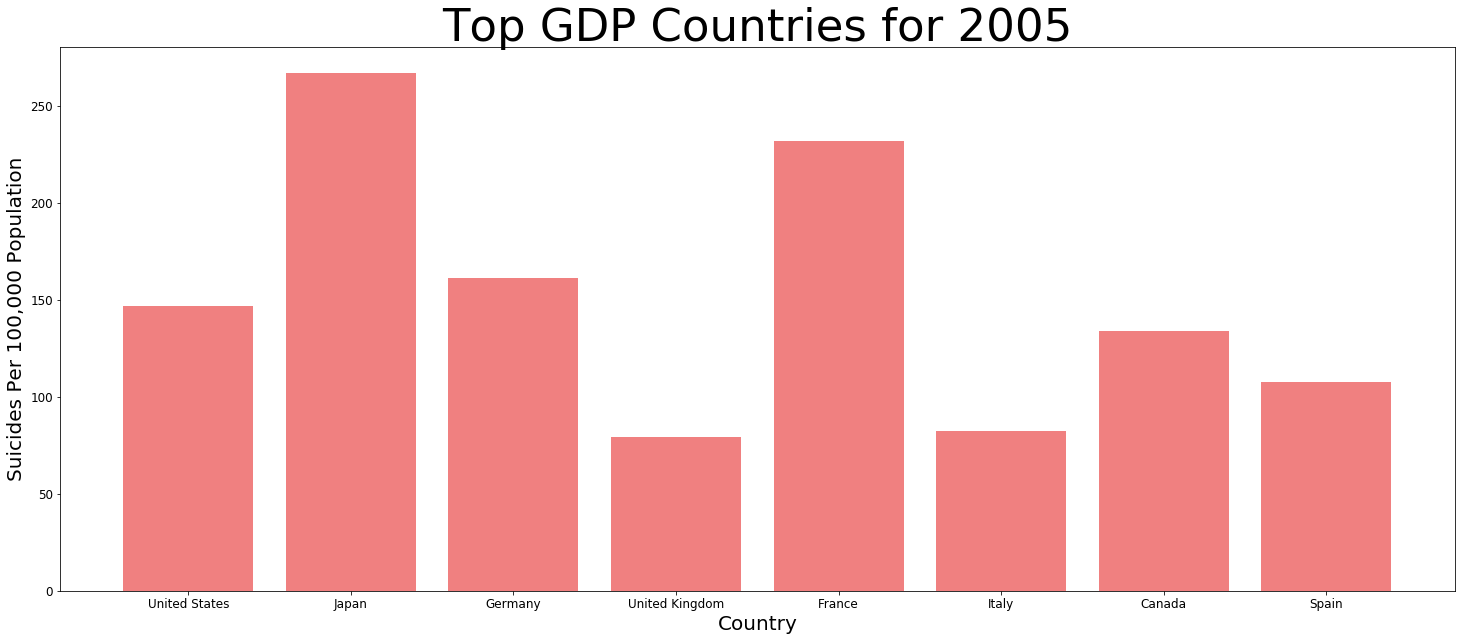

In [9]:
# Create an array that contains the number of users each language has
country2= gdp_2005_df_top_8['country']
suicides2=gdp_2005_df_top_8['suicides/100k pop']

# Tell matplotlib where we would like to place each of our x axis headers
plt.figure(figsize=(25,10))
plt.bar(country2, suicides2, color="lightcoral", align="center")

# # Give the chart a title, x label, and y label

plt.title("Top GDP Countries for 2005",fontsize=45)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Suicides Per 100,000 Population",fontsize=20)
plt.rcParams['font.size'] = 12.0

plt.savefig('top8_gdp_2005.png')


In [10]:
# # Create new df for top 4 gdp countries and their suicide rates for comparison

# sui_top4_2015 = gdp_2015_df_top_8.head(4)
# top4_2015 = sui_top4_2015

# sui_top4_2005 = gdp_2005_df_top_8.head(4)
# top4_2005 = sui_top4_2005

##  Display scatter plot  w/regression line

## ALL

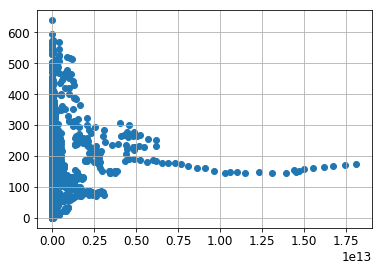

In [11]:
x_axis = su_vs_gdp_c_df['year_gdp']
y_axis = su_vs_gdp_c_df['suicides/100k pop']
plt.grid(True)

plt.scatter(x_axis, y_axis)

(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept



#plt.savefig("Sui_vs_GDP_Scatter.png")

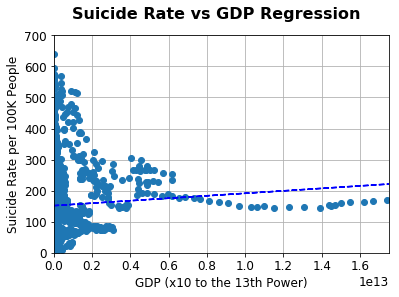

In [12]:



fig, ax = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Regression", fontsize=16, fontweight="bold")

ax.set_xlim(0, 17500000000000)
ax.set_ylim(0, 700)

ax.set_xlabel("GDP (x10 to the 13th Power)")
ax.set_ylabel("Suicide Rate per 100K People")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')
plt.grid(True)

#plt.savefig("Sui_vs_GDP_regression.png")

plt.show()

In [13]:
(t_stat, p) = stats.ttest_ind(x_axis, y_axis, equal_var=False)
t_stat


14.760431231640396

In [14]:
(t_stat, p) = stats.ttest_ind(x_axis, y_axis, equal_var=False)
p


3.402836006166142e-47

## 2015

In [17]:
su_vs_gdp_2015_df = su_vs_gdp_c_df.query("year == '2015'")
su_vs_gdp_2015_nous_df = su_vs_gdp_2015_df.query("country != 'United States'")
su_vs_gdp_2015_nous_df.head()

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
48,48,Antigua and Barbuda2015,Antigua and Barbuda,2015,1,91889,15.62,1.360000e+09,"$14,853.00"
79,79,Argentina2015,Argentina,2015,3073,39699624,112.13,5.950000e+11,"$14,981.00"
103,103,Armenia2015,Armenia,2015,74,2795335,45.28,1.060000e+10,"$3,775.00"
148,148,Australia2015,Australia,2015,3027,22240785,154.18,1.350000e+12,"$60,656.00"
179,179,Austria2015,Austria,2015,1251,8219386,194.62,3.820000e+11,"$46,484.00"


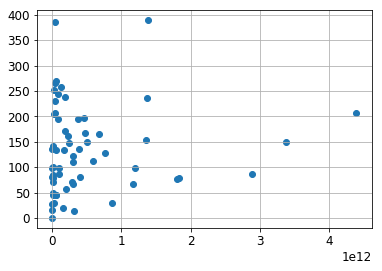

In [40]:
x_axis_2015 = su_vs_gdp_2015_nous_df['year_gdp']
y_axis_2015 = su_vs_gdp_2015_nous_df['suicides/100k pop']

plt.grid(True)

#plt.savefig("Sui_vs_GDP_Scatter_2015.png")

plt.scatter(x_axis_2015, y_axis_2015)

In [41]:
(slope, intercept, _, _, _) = linregress(x_axis_2015, y_axis_2015)
fit = slope * x_axis_2015 + intercept

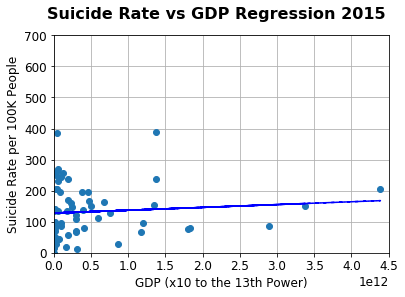

2.501178306126408e-05

In [42]:

fig, ax_2015 = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Regression 2015", fontsize=16, fontweight="bold")

ax_2015.set_xlim(0, 4500000000000)
ax_2015.set_ylim(0, 700)

ax_2015.set_xlabel("GDP (x10 to the 13th Power)")
ax_2015.set_ylabel("Suicide Rate per 100K People")

ax_2015.plot(x_axis_2015, y_axis_2015, linewidth=0, marker='o')
ax_2015.plot(x_axis_2015, fit, 'b--')
plt.grid(True)

#plt.savefig("Sui_vs_GDP_regression_2015.png")

plt.show()
(t_stat, p) = stats.ttest_ind(x_axis_2015, y_axis_2015, equal_var=False)
p

In [43]:
(t_stat, p) = stats.ttest_ind(x_axis_2015, y_axis_2015, equal_var=False)
t_stat

4.568169046616642

## 2005

In [44]:
# Create df exlcuding US(since its an outlier)
su_vs_gdp_2005_df = su_vs_gdp_c_df.query("year == '2005'")
su_vs_gdp_2005_nous_df = su_vs_gdp_2005_df.query("country != 'United States'")
su_vs_gdp_2005_nous_df.head()

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
16,16,Albania2005,Albania,2005,0,2783320,0.00,8.160000e+09,"$2,931.00"
40,40,Antigua and Barbuda2005,Antigua and Barbuda,2005,0,80809,0.00,1.020000e+09,"$12,649.00"
69,69,Argentina2005,Argentina,2005,3058,35550617,128.18,1.990000e+11,"$5,590.00"
112,112,Aruba2005,Aruba,2005,10,93728,99.58,2.330000e+09,"$24,870.00"
169,169,Austria2005,Austria,2005,1399,7827461,235.25,3.160000e+11,"$40,367.00"


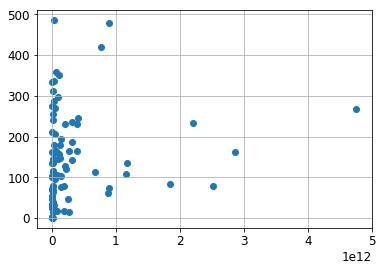

In [45]:
x_axis_2005 = su_vs_gdp_2005_nous_df['year_gdp']
y_axis_2005 = su_vs_gdp_2005_nous_df['suicides/100k pop']

plt.grid(True)

#plt.savefig("Sui_vs_GDP_Scatter_2005.png")

plt.scatter(x_axis_2005, y_axis_2005)

In [46]:
(slope, intercept, _, _, _) = linregress(x_axis_2005, y_axis_2005)
fit = slope * x_axis_2005 + intercept

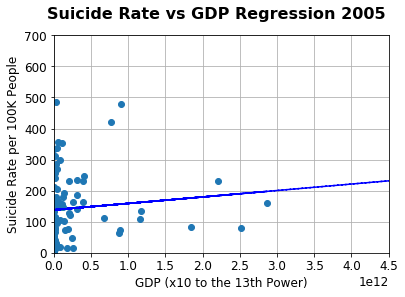

0.00016372935198783524

In [47]:

fig, ax_2005 = plt.subplots()

fig.suptitle("Suicide Rate vs GDP Regression 2005", fontsize=16, fontweight="bold")

ax_2005.set_xlim(0, 4500000000000)
ax_2005.set_ylim(0, 700)

ax_2005.set_xlabel("GDP (x10 to the 13th Power)")
ax_2005.set_ylabel("Suicide Rate per 100K People")

ax_2005.plot(x_axis_2005, y_axis_2005, linewidth=0, marker='o')
ax_2005.plot(x_axis_2005, fit, 'b--')
plt.grid(True)

#plt.savefig("Sui_vs_GDP_regression_2005.png")

plt.show()
(t_stat, p) = stats.ttest_ind(x_axis_2005, y_axis_2005, equal_var=False)
p

## GDP per capita

In [48]:
su_vs_gdp_percap_high_2005_df = su_vs_gdp_2005_df.sort_values(by=['gdp_per_capita'], ascending=False)
su_vs_gdp_percap_high_2005_df.head(62)

,Unnamed: 0,country-year,country,year,suicides_no,population,suicides/100k pop,year_gdp,gdp_per_capita
1402,1402,Mexico2005,Mexico,2005,4274,96730008,62.22,8.770000e+11,"$9,071.00"
1297,1297,Luxembourg2005,Luxembourg,2005,49,437338,159.07,3.730000e+10,"$85,397.00"
1604,1604,Poland2005,Poland,2005,6045,36371365,186.04,3.060000e+11,"$8,417.00"
459,459,Chile2005,Chile,2005,1682,14893574,147.43,1.230000e+11,"$8,256.00"
1265,1265,Lithuania2005,Lithuania,2005,1319,3174728,485.79,2.610000e+10,"$8,229.00"
1510,1510,Norway2005,Norway,2005,533,4335092,142.09,3.090000e+11,"$71,215.00"
1244,1244,Latvia2005,Latvia,2005,564,2137831,312.06,1.690000e+10,"$7,916.00"
881,881,Grenada2005,Grenada,2005,6,93685,160.82,6.950000e+08,"$7,422.00"
1832,1832,San Marino2005,San Marino,2005,1,28264,34.01,1.960000e+09,"$69,301.00"
2314,2314,Uzbekistan2005,Uzbekistan,2005,1221,23600347,67.81,1.430000e+10,$606.00
